In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from astropy.io import fits
import matplotlib as mpl
from matplotlib.collections import LineCollection
import random
import math
import plotly.graph_objects as go
from matplotlib.patches import Circle

In [3]:
#initialize all functions
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14
def InitializePlot():
    plt.clf()
    plt.figure(figsize=(8,6))
    plt.xlabel('F606W - F814W (mag)')
    plt.ylabel('F814W (mag)')
    plt.gca().invert_yaxis()
    plt.xlim(-1.5, 3)
    plt.ylim(28.5, 22)
def InitializePlot2():
    plt.clf()
    plt.figure(figsize=(8,8))
    plt.xlabel('Delta RA')
    plt.ylabel('Delta DEC')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_xaxis()
def ra_deg(s):
    hours, minutes, seconds = s.split(':')
    degrees = 15*(float(hours) + float(minutes)/60 + float(seconds)/3600)
    return degrees
def dec_deg(s):
    hours, minutes, seconds = s.split(':')
    degrees = float(hours) + float(minutes)/60 + float(seconds)/3600
    return degrees

In [6]:
#define fits file path here
hdulist = fits.open('../fits_files/hlsp_angst_hst_acs-wfc_9884-m81f12d1_f606w-f814w_v1_gst.fits') 

In [8]:
#define center of the galaxy here
centerRA = ra_deg('09:50:10.0') #replace with actual center
centerDEC = dec_deg('67:30:24') #replace with actual center

<Figure size 640x480 with 0 Axes>

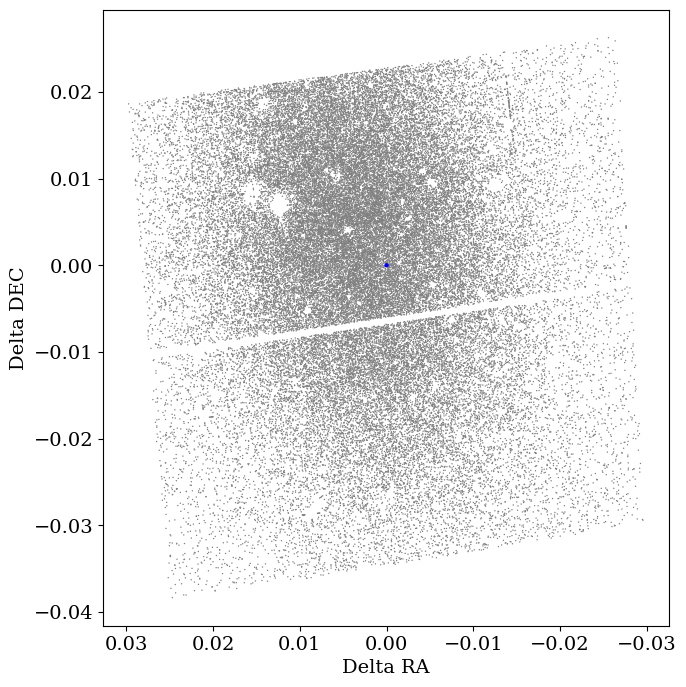

In [10]:
#Plots the cosine corrected stellar diagram
star = hdulist[1].data
star_606 = np.zeros(len(star))
star_814 = np.zeros(len(star))
star_RA = np.zeros(len(star))
star_DEC = np.zeros(len(star))
for i in range (0, len(star), 1):
    star_RA[i] = star[i][2]
    star_DEC[i] = star[i][3]
    star_606[i] = star[i][4]
    star_814[i] = star[i][12]
deltaRATar = star_RA - centerRA
deltaDECTar = star_DEC - centerDEC
InitializePlot2()
deltaRA = (star_RA - centerRA) * math.cos(math.radians(centerDEC))
deltaDEC = star_DEC - centerDEC
plt.scatter(deltaRA, deltaDEC, c = 'gray', s = 1, edgecolors = 'none')
plt.scatter(0, 0, c = 'blue', s = 10, edgecolors = 'none')